<a href="https://colab.research.google.com/github/PurabPatel555/VentilatorManeuverExtraction/blob/main/VentExtract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import os
from sklearn import svm
from sklearn.preprocessing import normalize

In [3]:
train_names_true = os.listdir('/content/drive/My Drive/Maneuvers')
train_names_false = os.listdir('/content/drive/My Drive/ManeuversWrong')

In [4]:
X = []
Y = []
for train_name_true in train_names_true:
  x = np.genfromtxt(os.path.join("/content/drive/My Drive/Maneuvers", train_name_true), dtype=str, deletechars="b'")
  x = np.transpose(x)
  x = x[3][1:]
  x = x.astype(float)
  X.append(x)
  Y.append(1)
for train_name_false in train_names_false:
  x = np.genfromtxt(os.path.join("/content/drive/My Drive/ManeuversWrong", train_name_false), dtype=str, deletechars="b'")
  x = np.transpose(x)
  x = x[3][1:]
  x = x.astype(float)
  X.append(x)
  Y.append(0)

In [5]:
X = normalize(X, norm='max', axis=1)

In [6]:
clf = svm.SVC()
clf.fit(X,Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [19]:
x_extract = np.genfromtxt(os.path.join("/content/drive/My Drive/ManeuversRaw", "Rb13-R1LH.ASC"), dtype=str, deletechars="b'")

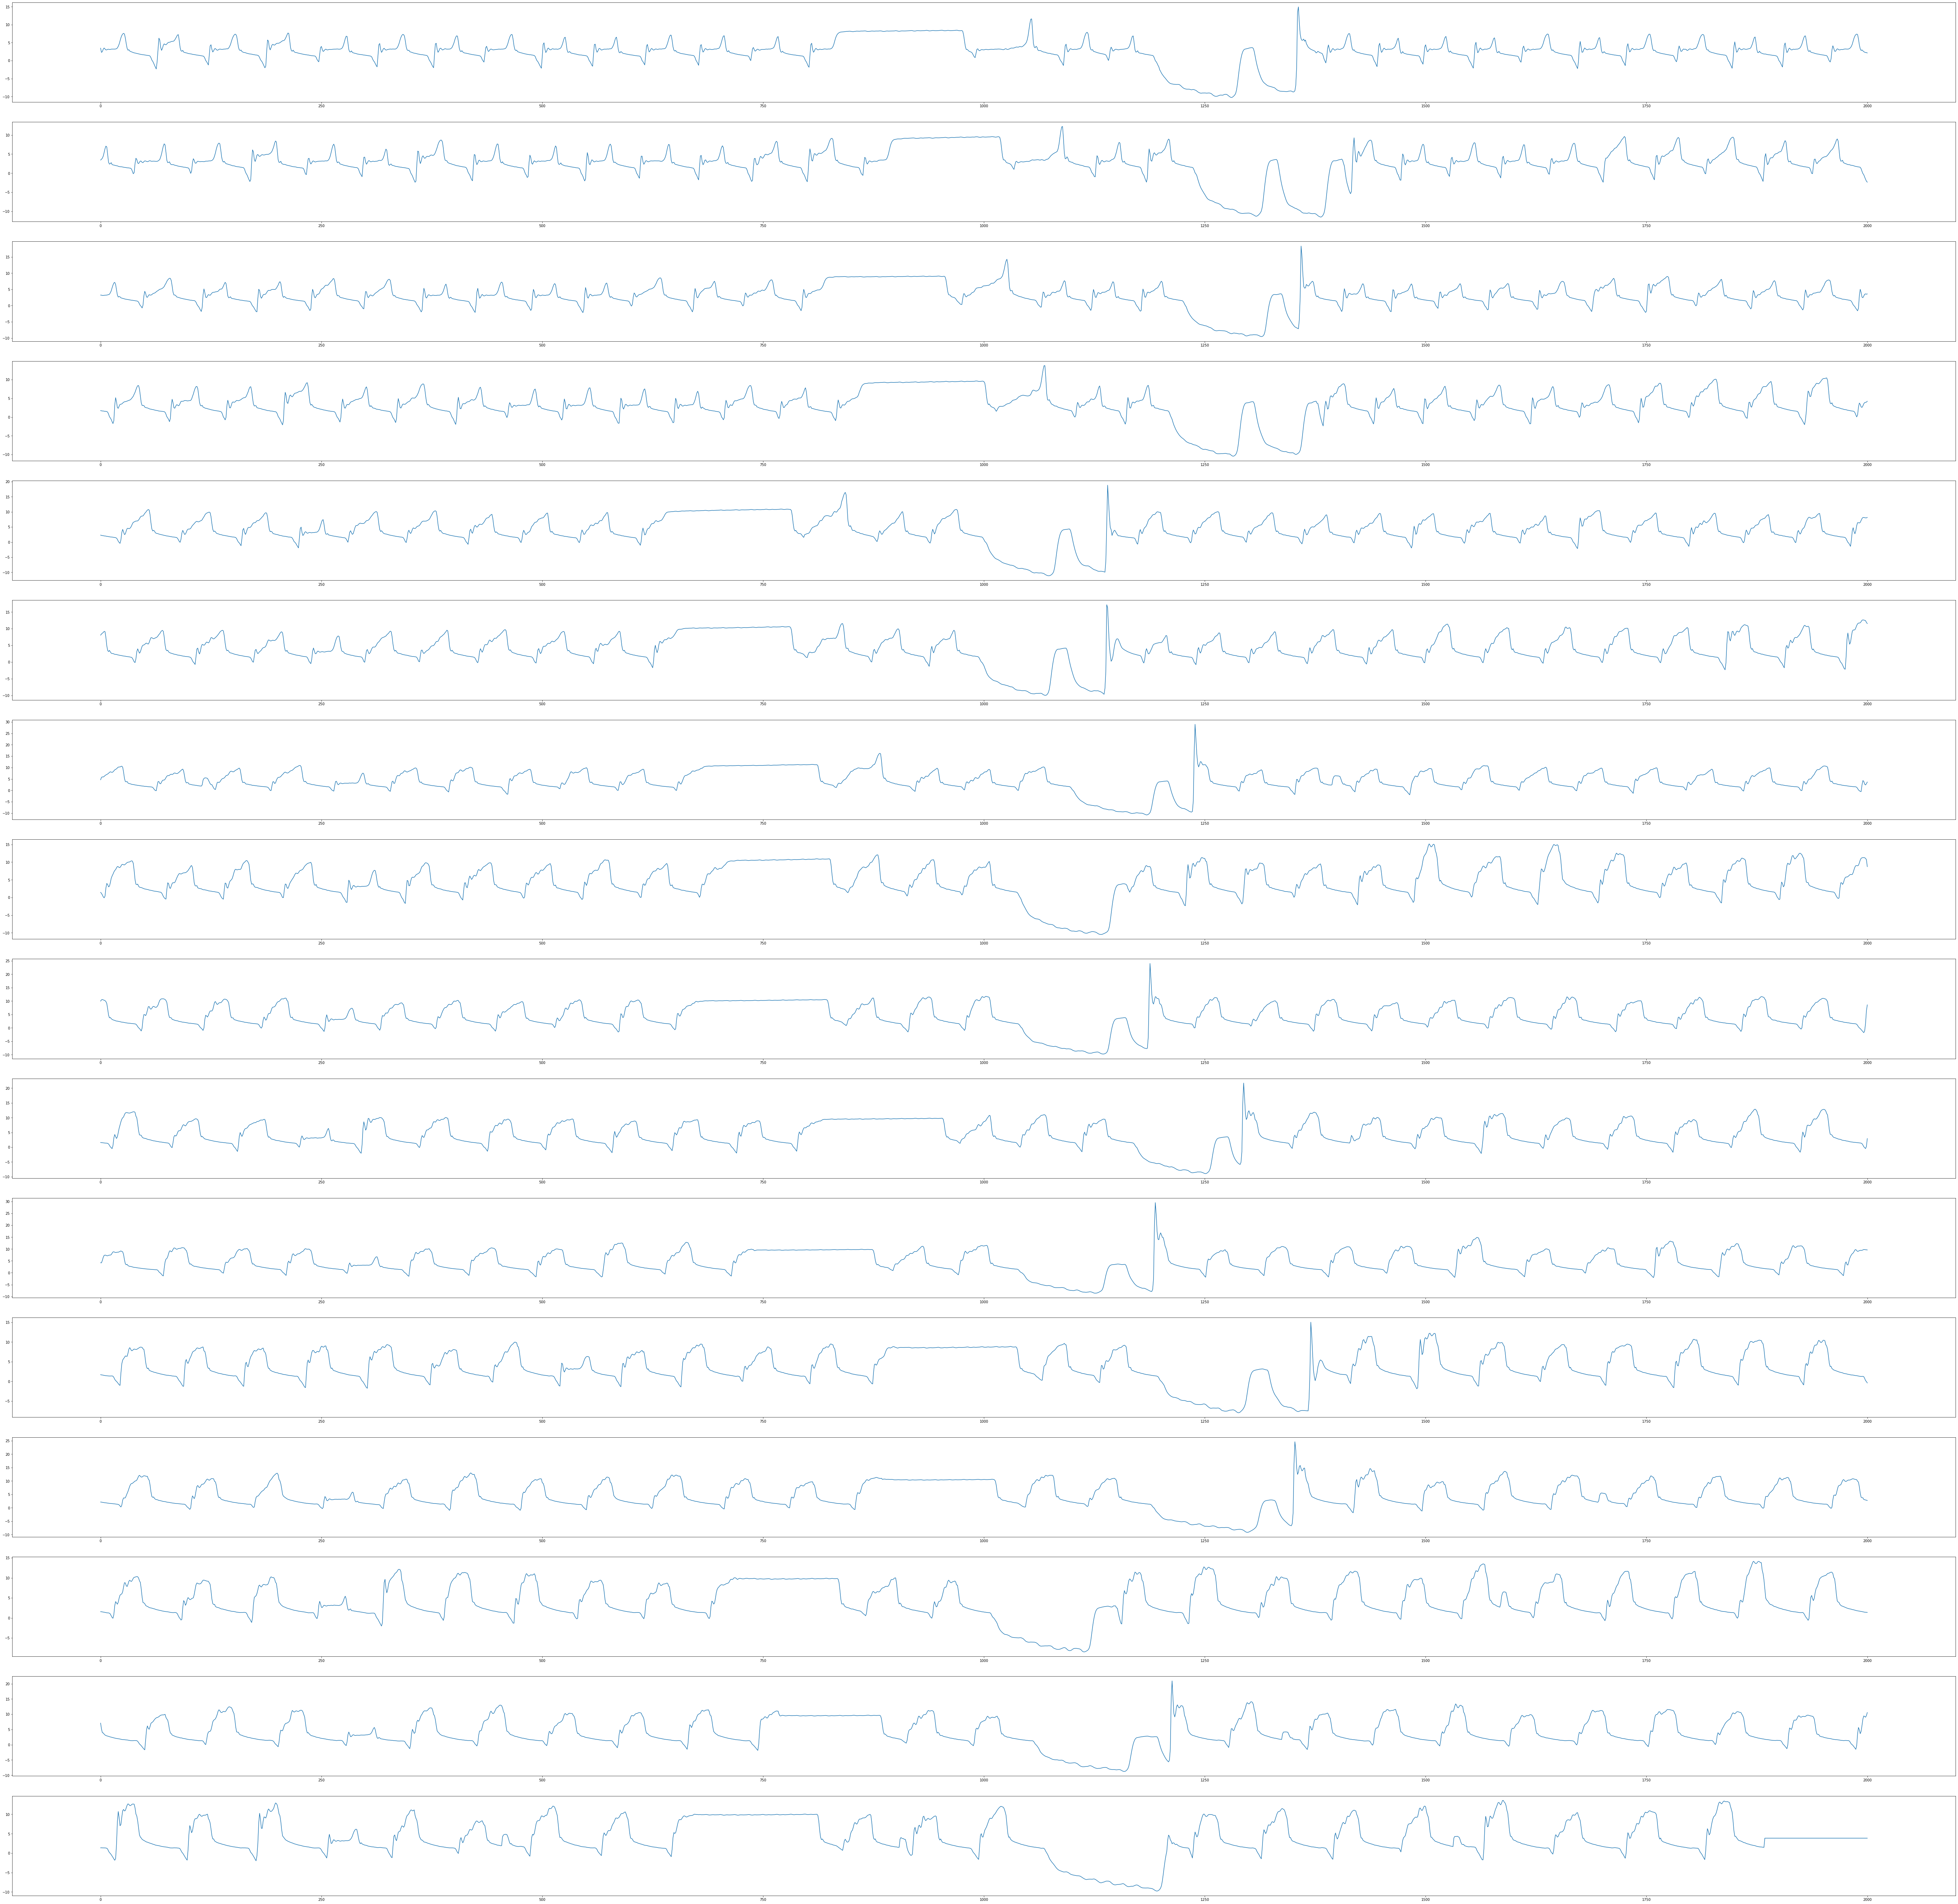

In [20]:
x = np.transpose(x_extract)
x = x[:,1:]
x = x.astype(float)
id = 0 
id_extract = []
plotnum = 0
fig = plt.figure(figsize=(100, 100))
while True:
  xx = x[3,id:(id+2001)]
  if (len(xx)==0):
    break
  if (len(xx) < 2001):
    xx = np.pad(xx, (0,(2001-len(xx))), mode='mean')
  if (clf.predict(normalize([xx], norm='max', axis=1))==1):
    id = id+250
    plotnum = plotnum+1
    plt.subplot(16,1,plotnum)
    plt.plot(xx)
    id_extract.append(id)
    id = id+4000
  else:
    id = id+250

In [26]:
run = np.genfromtxt(os.path.join("/content/drive/My Drive/ManeuversRaw", "Rb13-R1LH.ASC"), dtype=str, deletechars="b'")
run = np.transpose(run)
print(run)
for start in id_extract:
  run_sample = np.hstack((np.transpose([run[:,0]]), run[:,start:(start+2001)]))
  print(run_sample)
  np.savetxt(('/content/drive/My Drive/ManeuversRaw/'+str(start)+'.ASC'), np.transpose(run_sample), fmt='%s', delimiter = '\t')

[['Time' '0.016' '0.032' ... '2902.112' '2902.128' '2902.144']
 ['Flow' '0.045328' '0.060705' ... '-0.026148' '-0.025691' '-0.025201']
 ['Volume' '0.000725' '0.001697' ... '1.143643' '1.143232' '1.142829']
 ...
 ['SViFlow' '0.011500' '0.014750' ... '-0.030500' '-0.030000' '-0.029836']
 ['SViPaw' '-1.500' '-1.399' ... '1.500' '1.500' '1.500']
 ['SViState' '32' '32' ... '0' '0' '0']]
[['Time' '180.000' '180.016' ... '211.968' '211.984' '212.000']
 ['Flow' '0.048964' '0.049544' ... '-0.032052' '-0.031254' '-0.031075']
 ['Volume' '0.088849' '0.089642' ... '0.111801' '0.111301' '0.110804']
 ...
 ['SViFlow' '0.000875' '0.009500' ... '-0.036500' '-0.036094' '-0.035586']
 ['SViPaw' '1.450' '3.200' ... '2.000' '1.900' '1.834']
 ['SViState' '32' '32' ... '0' '0' '0']]
[['Time' '356.000' '356.016' ... '387.968' '387.984' '388.000']
 ['Flow' '0.040649' '0.038541' ... '0.023729' '0.046094' '0.064857']
 ['Volume' '0.187713' '0.188330' ... '0.196691' '0.197428' '0.198466']
 ...
 ['SViFlow' '0.048000'